In [206]:
print(''' 데이터가져오기
데이터 결측치 확인 - 처리
데이터 이상치 확인 - 처리
데이터 정규화 ( x - mean) / std
아달린모델 적용
확인하기 - 시각화
''')

 데이터가져오기
데이터 결측치 확인 - 처리
데이터 이상치 확인 - 처리
데이터 정규화 ( x - mean) / std
아달린모델 적용
확인하기 - 시각화



In [207]:
import pandas as pd
import numpy as np
import seaborn as sns

In [208]:
df = pd.read_csv('https://raw.githubusercontent.com/leekyuyoung20221226/python/main/data/train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [209]:
x = df[['Pclass', 'Sex','Age']]
y = df['Survived'] 

In [210]:
y[y == 0] = -1

<ipython-input-210-eee1c2f61a88>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y == 0] = -1


In [211]:
np.unique(y)

array([-1,  1])

In [212]:
x.isnull().sum()

Pclass      0
Sex         0
Age       177
dtype: int64

<AxesSubplot:>

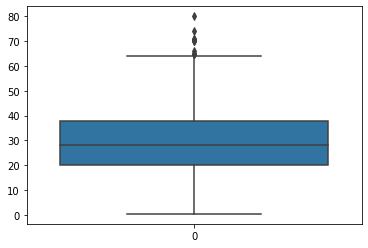

In [213]:
sns.boxplot(data=x['Age'])

In [214]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Sex     891 non-null    object 
 2   Age     714 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 21.0+ KB


In [215]:
x[x.isnull().any(axis = 1)]

,Pclass,Sex,Age
5,3,male,NaN
17,2,male,NaN
19,3,female,NaN
26,3,male,NaN
28,3,female,NaN
...,...,...,...
859,3,male,NaN
863,3,female,NaN
868,3,male,NaN
878,3,male,NaN


In [216]:
# df[df['Sex']== 'male']['Sex'] = 0
# df[df['Sex']== 'female']['Sex'] = 1
x['Sex'] = x['Sex'].map({'male':0,'female':1})

<ipython-input-216-6bb6032f6e35>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Sex'] = x['Sex'].map({'male':0,'female':1})


In [217]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Sex     891 non-null    int64  
 2   Age     714 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 21.0 KB


In [218]:
# Pclass별 Sex별 Age에 대한 중위수를 구해서 해당 결측치를 치환한다.
grouped = x.groupby(['Pclass','Sex'])

In [219]:
grouped['Age'].median()

Pclass  Sex
1       0      40.0
        1      35.0
2       0      30.0
        1      28.0
3       0      25.0
        1      21.5
Name: Age, dtype: float64

In [220]:
x.fillna(grouped.transform('median'), inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [221]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Sex     891 non-null    int64  
 2   Age     891 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 21.0 KB


데이터 정규화

In [222]:
x['Pclass'] = (x['Pclass'] - x['Pclass'].mean()) / x['Pclass'].std()
x['Sex'] = (x['Sex'] - x['Sex'].mean()) / x['Sex'].std()
x['Age'] = (x['Age'] - x['Age'].mean()) / x['Age'].std()
# temp = x.apply(lambda x: (x-x.mean()) / x.std() , axis=1)

<ipython-input-222-8cc0f7592b47>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Pclass'] = (x['Pclass'] - x['Pclass'].mean()) / x['Pclass'].std()
<ipython-input-222-8cc0f7592b47>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Sex'] = (x['Sex'] - x['Sex'].mean()) / x['Sex'].std()
<ipython-input-222-8cc0f7592b47>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [223]:
rgen = np.random.RandomState(1)
w =  rgen.normal(loc=0.0, scale=0.01,size=1+x.shape[1])

In [224]:
output = np.dot(x, w[1:]) + w[0]
errors = (y - output)
errors

0     -1.020815
1      0.988505
2      0.993461
3      0.986085
4     -1.010331
         ...   
886   -1.024100
887    0.973181
888   -1.010168
889    0.967777
890   -1.012750
Name: Survived, Length: 891, dtype: float64

In [225]:
# x.shape   (891, 3)
# x.T.shape  (3, 891)
# errors.shape  (891,)

x.T.dot(errors)
# x.dot(errors)

Pclass   -292.295000
Sex       473.617209
Age       -44.788931
dtype: float64

In [226]:
class AdalineGD(object):
  ''' 아달린
  parameter : 
    eta : float (0.0~1.0)  학습률
    n_iter : int  반복훈련 횟수
    random_sate : int 랜덤시드값
    w_ : 가중치(학습)
    cost_ : list  에포크마다 누적된 비용함수의 제곱합
  '''
  def __init__(self,eta=0.01, n_iter=50, random_state = 1) -> None:
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state
  def fit(self, x,y):
    ''' 훈련함수
      x : array, shape = (samples, features )
      y : array, shape = (samples )      
    '''
    rgen = np.random.RandomState(self.random_state)
    self.w_ =  rgen.normal(loc=0.0, scale=0.01,size=1+x.shape[1])
    self.cost_ = []
    for i in range(self.n_iter):
      net_input = self.net_input(x);
      output = self.activation(net_input);
      errors = (y - output)
      # x 행렬, erros 벡터
      # 행렬-벡터 곱셈  x.T.dot(erros)
      self.w_[1:] += self.eta*x.T.dot(errors)
      self.w_[0] += self.eta*errors.sum()
      cost = (errors**2).sum() / 2.0
      self.cost_.append(cost)
    return self

  def net_input(self, x):
    '''최종입력 함수'''
    return np.dot(x, self.w_[1:]) + self.w_[0]
  def activation(self, x):
    '''선형 활성화 계산
    단순 항등 함수이기때문에 아무런 영향을 미치지 않음
    '''
    return x
  def predict(self, x):
    ''' 단위 계단함수를 사용해서 클래스 레이블을 반환'''
    return np.where(self.activation(self.net_input(x)) >=0.0, 1, -1  )
  


In [227]:
adal = AdalineGD(eta = 0.001, n_iter = 50).fit(x.to_numpy(),y.to_numpy())

In [228]:
import matplotlib.pyplot as plt

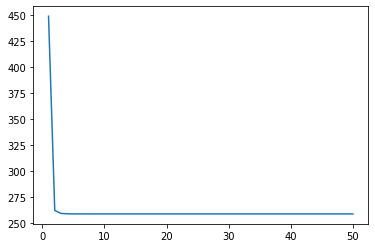

In [229]:
plt.plot(range(1, len(adal.cost_)+1),adal.cost_)
plt.show()

In [230]:
(adal.predict(x) == y).sum() / len(y)

0.7912457912457912

In [231]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
y[y == -1] = 0
xgb.fit(x,y)
xgb.score(x,y)

<ipython-input-231-f805f045cb7d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y == -1] = 0


0.8698092031425365

대규모 데이터를 사용한 적응형 선형 뉴런(아달린)
  - 확률적 경사하강법 : 가중치가 자주 업데이트된다, 수렴 속도가 빠르다
  - 훈련셈플을 무작위로 주입
  - 매 에포크마다 훈련 데이터셋을 섞는다

In [232]:
class AdalineSGD(object):
    """ADAptive LInear NEuron 분류기

    Parameters
    ------------
    eta : float
      학습률 (0.0과 1.0 사이)
    n_iter : int
      훈련 데이터셋 반복 횟수
    shuffle : bool (default: True)
      True로 설정하면 같은 반복이 되지 않도록 에포크마다 훈련 데이터를 섞습니다
    random_state : int
      가중치 무작위 초기화를 위한 난수 생성기 시드

    Attributes
    -----------
    w_ : 1d-array
      학습된 가중치
    cost_ : list
      모든 훈련 샘플에 대해 에포크마다 누적된 평균 비용 함수의 제곱합

    """
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state
        
    def fit(self, X, y):
        """훈련 데이터 학습

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          n_samples 개의 샘플과 n_features 개의 특성으로 이루어진 훈련 데이터
        y : array-like, shape = [n_samples]
          타깃 벡터

        반환값
        -------
        self : object

        """
        self._initialize_weights(X.shape[1])
        self.cost_ = []        
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self

    # 온라인 학습법.. 주어진 데이터로 학습한후. 추가데이터가 있을경우 해당 데이터만 추가로 학습
    def partial_fit(self, X, y):
        """가중치를 다시 초기화하지 않고 훈련 데이터를 학습합니다"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self

    def _shuffle(self, X, y):
        """훈련 데이터를 섞습니다"""
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """랜덤한 작은 수로 가중치를 초기화합니다"""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1 + m)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
        """아달린 학습 규칙을 적용하여 가중치를 업데이트합니다"""
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost
    
    def net_input(self, X):
        """입력 계산"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """선형 활성화 계산"""
        return X

    def predict(self, X):
        """단위 계단 함수를 사용하여 클래스 레이블을 반환합니다"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

데이터 확보

In [233]:
s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df =  pd.read_csv(s,header=None)
df = df.iloc[:100]
x = df.iloc[:,[0,2]]
y = df.iloc[:,-1]
y[:50] = -1
y[50:] = 1
y = y.astype(int)
x = x.to_numpy()
y = y.to_numpy()

<ipython-input-233-7e7656e5ee18>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[:50] = -1
<ipython-input-233-7e7656e5ee18>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[50:] = 1


In [234]:
x_std = np.copy(x)
x_std[:,0] = (x[:,0] - x[:,0].mean()) / x[:,0].std()
x_std[:,1] = (x[:,1] - x[:,1].mean()) / x[:,1].std()

In [235]:
ada = AdalineSGD(n_iter=15, eta = 0.01, random_state=1)
ada.fit(x_std, y)

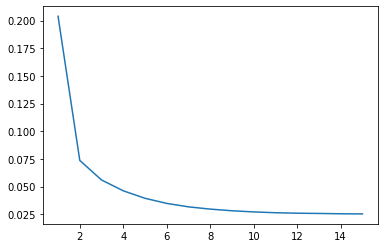

In [236]:
plt.plot(range(1,len(ada.cost_)+1), ada.cost_)
plt.show()

퍼셉트론 훈련

In [237]:
from sklearn import datasets

In [238]:
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [239]:
x = iris.data[:,[2,3]]
y = iris.target

In [240]:
from sklearn.model_selection import train_test_split

In [241]:
# 7: 3
x_train,x_test,y_train,y_test =  train_test_split(x,y,random_state=1, test_size=0.3, stratify=y)

In [242]:
np.bincount(y_train), np.bincount(y_test)

(array([35, 35, 35]), array([15, 15, 15]))

In [243]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(x_train)
x_train_scaled = ss.transform(x_train)
x_test_scaled = ss.transform(x_test)

In [245]:
from sklearn.linear_model import Perceptron
p = Perceptron(eta0 = 0.1, random_state=1)
p.fit(x_train_scaled, y_train)

Perceptron(eta0=0.1, random_state=1)

In [246]:
# 예측
y_pred = p.predict(x_test_scaled)

In [247]:
# 성능 몇개 맞추고 몇개 틀렸는지.... 확률... 정확률.. accuracy

In [249]:
from sklearn.metrics import accuracy_score
np.round(accuracy_score(y_test, y_pred),3)

0.978

In [ ]:
class LogisticRegressionGD(object):
  ''' 경사하강법을 사용한 로지스특 회귀
  parameter : 
    eta : float (0.0~1.0)  학습률
    n_iter : int  반복훈련 횟수
    random_sate : int 랜덤시드값
    w_ : 가중치(학습)
    cost_ : list  에포크마다 누적된 비용함수의 제곱합
  '''
  def __init__(self,eta=0.01, n_iter=50, random_state = 1) -> None:
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state
  def fit(self, x,y):
    ''' 훈련함수
      x : array, shape = (samples, features )
      y : array, shape = (samples )      
    '''
    rgen = np.random.RandomState(self.random_state)
    self.w_ =  rgen.normal(loc=0.0, scale=0.01,size=1+x.shape[1])
    self.cost_ = []
    for i in range(self.n_iter):
      net_input = self.net_input(x);
      output = self.activation(net_input);
      errors = (y - output)
      # x 행렬, erros 벡터
      # 행렬-벡터 곱셈  x.T.dot(erros)
      self.w_[1:] += self.eta*x.T.dot(errors)
      self.w_[0] += self.eta*errors.sum()
      
      # 오차 제곱합 대신 로지스틱 비용을 계산
      cost = -y.dot(np.log(output)) - (1-y).dot(np.log(1-output))
      self.cost_.append(cost)
    return self

  def net_input(self, x):
    '''최종입력 함수'''
    return np.dot(x, self.w_[1:]) + self.w_[0]
  def activation(self, x):
    '''선형 활성화 계산
    단순 항등 함수이기때문에 아무런 영향을 미치지 않음
    '''
    return x
  def predict(self, x):
    ''' 단위 계단함수를 사용해서 클래스 레이블을 반환'''
    return np.where(self.activation(self.net_input(x)) >=0.0, 1, -1  )
  
